In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from io import StringIO
import requests

# Importing data from a google spreadsheet

Making plots in spreadsheet software can often times suck, but editing and manipulating data can be a fantastic way to try something out or store lookup tables in places where it's easy to find them.

Accessing a spreadsheet requires a few libraries: `StringIO` and `requests`. `requests` handles http requests so they don't hurt. And `StringIO` plays nicely with parsing the data into a readable CSV for the `pandas.read_csv` function.

In this example notebook I use data from Google Finance for GOOG's price, but typically I use this functionality for look up tables I have created myself or other small data sets. There are other ways to get stock prices into python.

## google sheets url

To generate the google sheet url I used the url that is generated to output a CSV for the active sheet. To do this you can do File > Download as > Comma Separated Values (.csv, current sheet). In Chrome you can then copy the url from the downloads page (CTRL + J).

In [2]:
s = 'https://docs.google.com/spreadsheets/d/1THmcc1fCwwLwY1eYCmyS8xJlmJQpLBMXy2YHCw_T5Ow/export?format=csv&id=1THmcc1fCwwLwY1eYCmyS8xJlmJQpLBMXy2YHCw_T5Ow&gid=258864920'
r = requests.get(s)
data = r.text
df = pd.read_csv(StringIO(data))
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

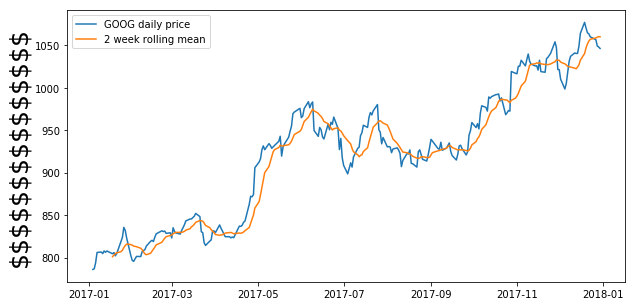

In [3]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(df.price, label='GOOG daily price')
ax.plot(df.rolling(window=10).mean(), label='2 week rolling mean')
ax.set_ylabel('\$'*15, fontsize=25)

ax.legend()

# Notes:

In this notebook I use data pulled from google Finance directly into a google sheet using the following function:

`=GOOGLEFINANCE("GOOG", "price", DATE(2017,1,1), DATE(2017,12,31), "DAILY")'`

In my experience, you cannot directly import the url for the spreadsheet if it comes from a function. The data cannot be output from a function it needs to be actual values, so copy and paste data into a new sheet as values only and delete the old sheet.